In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set(rc={"figure.dpi":150, 'savefig.dpi':200})
sns.set_context('notebook')
sns.set_style("ticks")
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 200
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [15]:
df = pd.read_csv('data/cleaned_august.csv')

In [16]:
df.drop(['key_0'], inplace=True, axis=1)

In [17]:
Z_data = df

In [18]:
Z_data

location  \
0                                         KM 16 ETIORO   
1                                         KM 20 OGBESE   
2                                                  KM5   
3                                                 KM25   
4     AFTER ITA IPELE VILLAGE 13KM FROM IKARE JUNCTION   
5                                     KM 2 IKR JUNCTN.   
6                   TISCO FARM 9KM FROM IKARE JUNCTION   
7             POLY SECOND GATE 7KM FROM IKARE JUNCTION   
8                                         50 M BY A& T   
9    EMURE AFTER SECOND MARKET 12.5KM FROM IKARE JU...   
10                                     KM 40 ONOPARAGA   
11                BOLORUNDURO 30KM FROM IKARE JUNCTION   
12                                         AWALE HOTEL   
13                                            GEDEGEDE   
14                                 TIPPER PARK AKUNGBA   
15                                           ADEFARATI   
16                            JOHNDECK FILLING STATION   
17        BEFORE ISUADA JUNCTION 1.5KM FROM IKARE JUNC   
18                      REPORT KM40 FROM BASE ONDO-ORE   
19                               KM 2 ADELABU  JUNCT.    
20                           KM 3 FUTA GATE NORTH GATE   
21                                           KM 12 ERO   
22                       KM 26 GILLVANT QUARRY FRM ORE   
23                                KM 17 IWARO OKA HILL   
24                       KM 4 ILARA MOKIN 1ST JUNCTION   
25                               KM 9 MIMIKO FARM AXIS   
26                                         KM 4 OKIGBO   
27                                    KM 28 OFOSU AXIS   
28                         KM 1 INFRONT OF FRSC OFFICE   
29                                           KM 7 IGBA   
30                                       KM 14 FRM ORE   
31                                  102 M OPP FORT OIL   
32                                     KM 6 IFE GARAGE   
33                                      KM 17 COSTYAIN   
34                                    KM 56 AJEBANDELE   
35      KM 24 AGO AYENI, 300M FROM BEST SOLUTION POLY.   
36                               KM 4 ILERE AFTER OSRC   
37                              KM 3.5 GIOAN DAYO AXIS   
38                      AJILO  KM10 FROM BASE ONDO-AKR   
39                                   KM 6 AZOP JUNCTN.   
40   KM1  IDI ORO STREET,BESIDE ST PAUL'S PRIMARY S...   
41                        KM 8 DUNAMIS FILLING STATION   
42                            SHAMROCK FILLING STATION   
43                                    KM 15 IGBARA OKE   
44                                 KM 3 IMADE COLLEGE    
45                                         KM 10 OWENA   
46                            KM 10 AYEGUNLE OBA AKOKO   
47                                    KM 17 IFE GARAGE   
48                      KM 11 PELE FROM IFE ROUNDABOUT   
49                     KM 9 INDICO FROM IFE ROUNDABOUT   
50                          KM 2 ONYARUGBULEM JUNCTION   
51                                       KM 21 LIYETU    
52                                    KM 1 COOP COCOA    
53                                     KM 1 AFTER BASE   
54                              KM1, OPPOSITE CAC IFON   
55                           KM 6, 40M FRM SHASHA MRKT   
56                                      KM 3 LAJE ROAD   
57                                 KM 12 OMOTOSHO AREA   
58                                 KM 45 ADEWALE AREA    
59                                    100M JUBULEE RD.   
60                                    23 KM 2ND BRIDGE   
61                                     KM 13 ADEFARATI   
62                           KM 1 SCAB FILLING STATION   
63                               KM 8 AIRPORT JUNCTION   
64                                   KM 4 ADO JUCNTION   
65                       KM 2 FUTA SOUTH GATE JUNCTION   
66             KM 28.5 MOLAWOLE FILLING STATION OGBESE   
67                                       KM 3 MTN MAST   
68                                   KM 3 OP

In [19]:
X = Z_data.drop(Z_data.columns[31:], axis=1)
y = Z_data[Z_data.columns[31:]]

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [21]:

y_train  = y_train.reindex(sorted(y_train.columns), axis=1)
y_test  = y_test.reindex(sorted(y_test.columns), axis=1)

### Train

In [22]:
Z_train = X_train

In [23]:
X_train.shape

(699, 31)

In [24]:
from sklearn.preprocessing import LabelBinarizer
lb3 = LabelBinarizer()
lb4 = LabelBinarizer()
binarized3 = pd.DataFrame(lb3.fit_transform(Z_train['route:from']), columns=['from:'+a for a in list(lb3.classes_)])
binarized4 = pd.DataFrame(lb4.fit_transform(Z_train['route:to']), columns=['to:'+a for a in list(lb4.classes_)])

In [25]:
def fix_duplicates(first, last):
    if first==1 or last==1:
        return 1
    elif first==0 and last==0:
        return 0

In [26]:
binarized4['to:ONDO'] = binarized4.apply(lambda x:fix_duplicates(x['to:ONDO'], x['to:OND']),axis=1)
binarized4['to:ISUA'] = binarized4.apply(lambda x:fix_duplicates(x['to:ISUA'], x['to:-ISUA']),axis=1)
binarized4['to:ORE'] = binarized4.apply(lambda x:fix_duplicates(x['to:ORE'], x['to:-ORE']),axis=1)
binarized4['to:OWO'] = binarized4.apply(lambda x:fix_duplicates(x['to:OWO'], x['to:OWO']),axis=1)
binarized4['to:IPT'] = binarized4.apply(lambda x:fix_duplicates(x['to:IPT'], x['to:-IPT']),axis=1)
binarized4['to:AJOWA'] = binarized4.apply(lambda x:fix_duplicates(x['to:AJOWA'], x['to:AJW']),axis=1)
binarized4['to:OKITIPUPA'] = binarized4.apply(lambda x:fix_duplicates(x['to:OKITIPUPA'], x['to:OKT']),axis=1)
binarized4['to:OKITIPUPA'] = binarized4.apply(lambda x:fix_duplicates(x['to:OKITIPUPA'], x['to:KTP']),axis=1)

binarized3['from:IFON'] = binarized3.apply(lambda x:fix_duplicates(x['from:IFON'], x['from:IFIN']),axis=1)
binarized3['from:ONDO'] = binarized3['from:ONDO'] +  binarized3['from:OND']

binarized4['to:ONDO'] = binarized4['to:ONDO'] +  binarized4['to:OND']
binarized4['to:T/SHIP'] = binarized4['to:T/SHIP'] +  binarized4['to:TSHIP']

In [27]:
binarized4.drop(['to:-IPT','to:-ISUA','to:OND','to:-OND','to:-ORE','to:TSHIP','to:0','to:AJW','to:OKT','to:KTP'], axis=1, inplace=True)
binarized3.drop(['from:OND','from:0','from:IFIN'], axis=1, inplace=True)

In [28]:
Z_trained = pd.merge(Z_train, binarized3, how='left', on = Z_train.index)
Z_trained.drop('key_0',axis=1, inplace=True)

In [29]:
Z_trained = pd.merge(Z_trained, binarized4, how='left', on = Z_train.index)
Z_trained.drop(['route:from','route:to'],axis=1, inplace=True)
Z_trained.drop(['key_0'], inplace=True,axis=1)
Z_trained =Z_trained.reindex(sorted(Z_trained.columns), axis=1)

In [30]:
Z_trained

arrival_minus_crash  arrival_minus_report  day  from:AKR  from:IFON  \
0                   1680                   300   16         0          0   
1                    600                   300   25         0          0   
2                    600                   360    5         1          0   
3                    720                   360   23         0          0   
4                    840                   360   23         0          0   
5                   1260                   840   17         0          0   
6                   5400                   600   26         0          0   
7                    420                   180    5         0          0   
8                    600                   240   14         0          0   
9                    900                   600   28         0          0   
10                   540                   300   12         0          0   
11                  1380                   780    7         0          0   
12                   600                   300   18         0          0   
13                  1200                   600    2         0          1   
14                 39900                   180   16         0          0   
15                   180                   120   11         0          0   
16                   900                   600   28         0          0   
17                   420                   240   22         0          0   
18                  1260                  1020    9         0          0   
19                   600                   300   12         1          0   
20                   420                   300    8         0          0   
21                   840                   360    2         0          0   
22                  1920                   720    9         1          0   
23                   480                   240    7         0          0   
24                   600                   360    6         0          0   
25                   480                   240    3         0          0   
26                   900                   600    9         0          0   
27                   180                   120   19         0          0   
28                  1140                   840   13         0          0   
29                   600                   300    2         0          0   
30                   300                   120    5         1          0   
31                   600                   480   23         0          0   
32                  1500                   600   15         0          0   
33                  1500                   120   15         1          0   
34                  1200                   780    5         0          0   
35                  1500                   540   11         1          0   
36                   660                   480   26         1          0   
37                  1320                   900    2         1          0   
38                   540                   180   21         1          0   
39                   720                   420   16         0          0   
40                   960                   480   29         1          0   
41                  2040                   840   16         0          0   
42                  1200                   600   26         0          1   
43                  6060                   360   27         0          0   
44                   120                    60   23         1          0   
45                   360                   360    7         0          0   
46                   240                   180    1         0          0   
47                  1500                   900    8         0          0   
48                  1740                  1620   12         0          1   
49                   300                   180   10         1          0   
50                  1080                   720   17         0          0   
51                   660                   360   14  

### Test

In [31]:
X_test.shape

(175, 31)

In [32]:
Z_t = X_test

In [33]:
lb10 = LabelBinarizer()
lb11 = LabelBinarizer()
binarized10 = pd.DataFrame(lb10.fit_transform(Z_t['route:from']), columns=['from:'+a for a in list(lb10.classes_)])
binarized11 = pd.DataFrame(lb11.fit_transform(Z_t['route:to']), columns=['to:'+a for a in list(lb11.classes_)])

In [34]:
def fix_duplicates(first, last):
    if first==1 or last==1:
        return 1
    elif first==0 and last==0:
        return 0
    

In [35]:
binarized11['to:AJOWA'] = binarized11.apply(lambda x:fix_duplicates(x['to:AJOWA'], x['to:AJW']),axis=1)
binarized11['to:ONDO'] = binarized11.apply(lambda x:fix_duplicates(x['to:ONDO'], x['to:OND']),axis=1)

In [36]:
binarized11.drop(['to:OND','to:-OWO','to:AJW' ], axis=1, inplace=True)
binarized10.drop(['from:OND'], axis=1, inplace=True)

In [37]:
Z_test = pd.merge(Z_t, binarized10, how='left', on = Z_t.index)
Z_test.drop('key_0',axis=1, inplace=True)

In [38]:
Z_test = pd.merge(Z_test, binarized11, how='left', on = Z_t.index)

In [39]:
Z_test.drop(['route:from','route:to'],axis=1, inplace=True)

In [40]:
Z_test.set_index('key_0', inplace=True)

In [41]:
Z_test.rename(columns={"to:KTP": "to:OKITIPUPA"}, inplace=True)

In [42]:
Z_test['to:IWARO'] = 0
Z_test['to:IKARAM'] = 0
Z_test['to:IFON'] = 0
Z_test['to:IJEBU'] = 0
Z_test['to:IDOANI'] = 0
Z_test['to:IBOROPA'] = 0
Z_test['to:AUCHI'] = 0
Z_test['to:ARIMOKIJA'] = 0
Z_test['from:IMORU'] = 0

In [43]:
Z_test =Z_test.reindex(sorted(Z_test.columns), axis=1)

In [44]:
X_test = Z_test

In [45]:
X_test.reset_index(inplace=True)

In [46]:
X_test.drop(['key_0'],axis=1, inplace=True)

In [47]:
X_test.shape

(175, 62)

### Model Training 

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [49]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense

In [50]:
Z_trained.drop(['vehicle_no'],axis=1, inplace=True)
X_test.drop(['vehicle_no'],axis=1, inplace=True)

In [51]:
len(X_test.columns)

61

In [52]:
len(Z_trained.columns)

61

In [53]:
X =Z_trained
y = y_train


In [54]:
X_new = pd.concat([Z_trained, X_test])
y_new = pd.concat([y_train, y_test])

In [55]:
y_new.shape

(874, 29)

In [56]:
location_vect = TfidfVectorizer()
vehicle_type_vect = TfidfVectorizer()
vehicle_cat = TfidfVectorizer()
vehicle_make = TfidfVectorizer()
vehicle_model = TfidfVectorizer()





ct = ColumnTransformer(
                [('location', location_vect, 'location'),
                 ('vehicle_type', vehicle_type_vect, 'vehicle_type'),
                 ('vehicle_cat', vehicle_cat, 'vehicle_cat'),
                 ('vehicle_make', vehicle_make, 'vehicle_make'),
                 ('vehicle_model', vehicle_model, 'vehicle_model'),
                ],
                 remainder = 'passthrough'
                )


pipe = Pipeline([
                ('tfidf', ct),
])


X = ct.fit_transform(X_new).toarray()

In [57]:
X[0].shape

(1118,)

In [58]:
y = y_new.values

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size = 0.3)

In [60]:
# One Hidden Layer
kernel_initializer='glorot_uniform'
ann_model1 = keras.models.Sequential([
        keras.layers.Dense(128, activation='relu',kernel_initializer='uniform', input_dim = X_train.shape[1]),
        keras.layers.Dense(128, activation='relu', kernel_initializer=kernel_initializer),
        keras.layers.Dense(29),
])
print(ann_model1.summary())

# loss and optimizer

loss = keras.losses.CategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(lr=0.001)

metrics = ['accuracy']

ann_model1.compile(loss = 'categorical_crossentropy', optimizer=optim, metrics=metrics)



batch_size = 4
epochs = 100

model = ann_model1.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size = batch_size, epochs=epochs,verbose=2)
scores = ann_model1.evaluate(X_test,y_test)
print("\n%s: %.2f%%" % (ann_model1.metrics_names[1], scores[1]*100))

ann_model1.save("model.h5")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               143232    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 29)                3741      
Total params: 163,485
Trainable params: 163,485
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
153/153 - 0s - loss: 13.2731 - accuracy: 0.0802 - val_loss: 17.5581 - val_accuracy: 0.0837
Epoch 2/100
153/153 - 0s - loss: 12.1116 - accuracy: 0.0900 - val_loss: 4.9695 - val_accuracy: 0.0875
Epoch 3/100
153/153 - 0s - loss: 5.0662 - accuracy: 0.0917 - val_loss: 4.9697 - val_accuracy: 0.0875
Epoch 4/100
153/153 - 0s - loss: 6.7301 - accuracy: 0.0917 - val_loss

Epoch 73/100
153/153 - 0s - loss: 17.1205 - accuracy: 0.0933 - val_loss: 17.4065 - val_accuracy: 0.0760
Epoch 74/100
153/153 - 0s - loss: 17.1205 - accuracy: 0.0933 - val_loss: 17.4065 - val_accuracy: 0.0760
Epoch 75/100
153/153 - 0s - loss: 17.1205 - accuracy: 0.0933 - val_loss: 17.4065 - val_accuracy: 0.0760
Epoch 76/100
153/153 - 0s - loss: 17.1205 - accuracy: 0.0933 - val_loss: 17.4065 - val_accuracy: 0.0760
Epoch 77/100
153/153 - 0s - loss: 17.1205 - accuracy: 0.0933 - val_loss: 17.4065 - val_accuracy: 0.0760
Epoch 78/100
153/153 - 0s - loss: 17.1205 - accuracy: 0.0933 - val_loss: 17.4065 - val_accuracy: 0.0760
Epoch 79/100
153/153 - 0s - loss: 17.1205 - accuracy: 0.0933 - val_loss: 17.4065 - val_accuracy: 0.0760
Epoch 80/100
153/153 - 0s - loss: 17.1205 - accuracy: 0.0933 - val_loss: 17.4065 - val_accuracy: 0.0760
Epoch 81/100
153/153 - 0s - loss: 17.1205 - accuracy: 0.0933 - val_loss: 17.4065 - val_accuracy: 0.0760
Epoch 82/100
153/153 - 0s - loss: 17.1205 - accuracy: 0.0933 - v

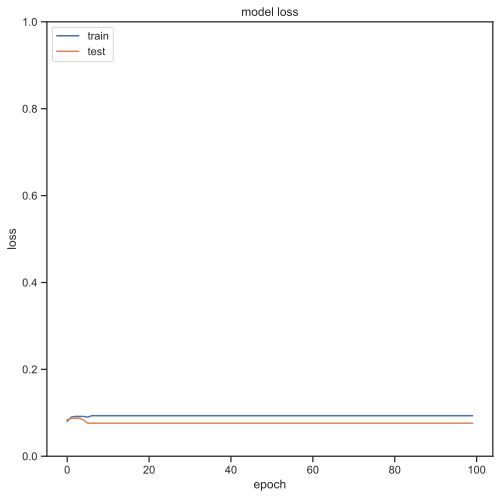

In [61]:
# summarize history for loss
f, ax = plt.subplots(figsize=(8, 8))
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch',)
plt.legend(['train', 'test'], loc='upper left')
ax.set(ylim=(0, 1))
plt.show()
f.savefig("charts/Loss Plot")

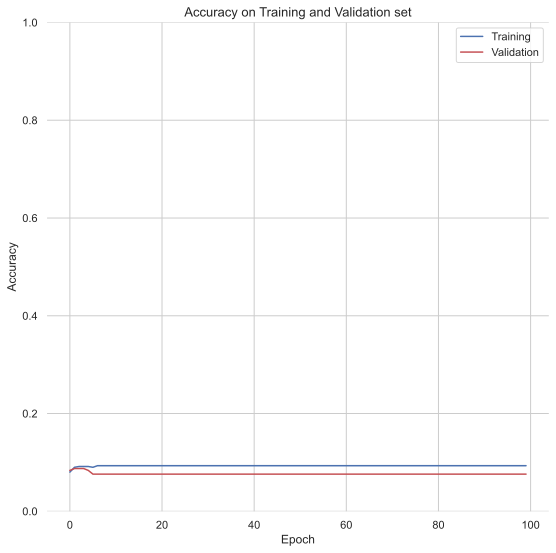

In [62]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(9, 9))

# Plot the total crashes
sns.lineplot(data=model.history['accuracy'],
            label="Training", color="b", markers='*', dashes=False)

sns.lineplot(data=model.history['val_accuracy'],
            label="Validation", color="r", markers=True, dashes=True)
# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper right", frameon=True)
ax.set(ylabel="Accuracy",
       xlabel="Epoch",ylim=(0, 1))


ax.set_title('Accuracy on Training and Validation set', fontsize=13)
    
sns.despine(left=True, bottom=True)
f.savefig("charts/annresults/original_acc.png")

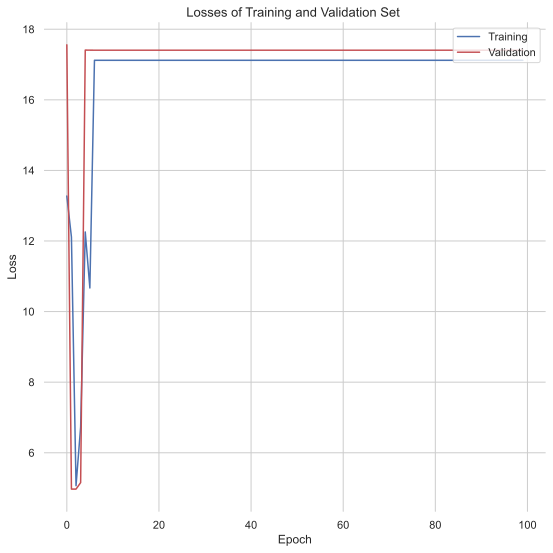

In [63]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(9, 9))

# Plot the total crashes
sns.lineplot(data=model.history['loss'],
            label="Training", color="b", markers='*', dashes=False)

sns.lineplot(data=model.history['val_loss'],
            label="Validation", color="r", markers=True, dashes=True)
# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper right", frameon=True)
ax.set(ylabel="Loss",
       xlabel="Epoch")


ax.set_title('Losses of Training and Validation Set ', fontsize=13)
    
sns.despine(left=True, bottom=True)
f.savefig("charts/annresults/original_loss.png")

### Test the prediction model using any index e.g. 30 in this case

In [64]:
def get_cause(predicted):
    maxim = predicted[0];
    #Loop through the array    
    for i in range(0, len(predicted)):    
        #Compare elements of array with max    
        if(predicted[i] > maxim):    
            maxim = predicted[i]; 
    print(maxim)
    predicted_value = [1 if b == maxim else 0 for b in predicted]
    print(predicted_value)
    match = ['BDR','BFL','BRD','DAD','DGD','DOT','DUI','FEV','FQT','FTG','FTQ','LOC','LSV','MDV','OBS','OTH','OVL','ROB','ROV','RTV','RUN','SLV','SOS','SPV','TBT','TYB','UPD','WOT','WOV']
    location = predicted_value.index(1)
    predicted_abb = match[location]
    causes = pd.read_csv('data/causes_schema.csv',index_col=None)
    for a in causes.values:
        if a[0] == predicted_abb:
            print("The causes of the accident is: ", a[1])
            break

In [65]:
X_test[59]
expected = y_test[59]


### Expected Output

In [66]:
get_cause(expected)

1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
The causes of the accident is:  Speed Violation


## Prediction Model

In [67]:
probability_model = keras.models.Sequential([
      ann_model1,keras.layers.Softmax()
])
predictions = probability_model(X_test)
prediction1 = predictions[59]
print(prediction1)

tf.Tensor(
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.9410393e-23 0.0000000e+00
 0.0000000e+00 1.3119508e-37 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 9.5982609e-14 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00], shape=(29,), dtype=float32)


In [68]:
max(prediction1)


<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [69]:
predicted = prediction1.numpy()

In [70]:
predicted = list(predicted)
print(predicted)

[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.9410393e-23, 0.0, 0.0, 1.3119508e-37, 0.0, 0.0, 0.0, 0.0, 9.598261e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


#### Prediction

In [71]:
get_cause(predicted)

1.0
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The causes of the accident is:  Dangerous Driving
